### NO-Show DATA SET
This project is based on the 'noshowappointments-kagglev2-may-2016.csv'
file that showed a number of patients that didn't show up at the doctors appointment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time as time

# Check for number of rows and columns using the DataFrame.shape attribute

In [2]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# Delete Data that won't be part of the analysis
using the DataFram.drop() method

In [3]:
data.drop(columns={'PatientId', 'AppointmentID'},axis=1,inplace=True)
data.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# Check for any duplicates or null values

In [4]:
data.duplicated().any()

True

The data.duplicated().any() method returned True which means that there are duplicate values

In [5]:
data.isnull().any()

Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

Fortunately the dataset returned no null values
# Now we will delete the duplicate values to avoid data redundancy
using the DataFrame.drop_duplicates() method

In [6]:
data.drop_duplicates(inplace=True)
data.shape

(109892, 12)

In [7]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000
mean,37.089506,0.098287,0.197248,0.071825,0.030430,0.022131,0.322881
std,23.121196,0.297704,0.397923,0.258199,0.171768,0.160878,0.467580
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Using the DataFrame.describe() method we found out some unlogical data
such as the minimum of Age is -1 !! This is impossible <br> We probably need to work it out and replace this -1 value with the mean of other values > 1

In [8]:
ages = data.query('Age < 0')
ages

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Here we found out that the only row that as age of -1 is of index <b>99832</b>

In [9]:
data.drop(99832, axis=0, inplace=True)

In [10]:
data.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [11]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now we have to rename columns to be lowercase and no space titles so we can access them easily

In [12]:
data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
data.rename(columns= {'no-show': 'no_show'},inplace=True)
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
data['scheduledday'] = pd.to_datetime(data['scheduledday'])
data['appointmentday'] = pd.to_datetime(data['appointmentday'])
data['day_diff'] = data['appointmentday'].dt.date- data['scheduledday'].dt.date
day_less_zero = data[data['day_diff']<'0 days']

Well this can't be possible the values of appointment days to be before the values that the patient scheduled his appointment
so we need to clean this too

In [14]:
data.drop(day_less_zero.index, axis=0, inplace=True)
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_diff
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [15]:
data[data['day_diff']<'0 days']

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_diff


Now that we have cleaned the days of schedulement and appointment let's contionue cleaning our data of day diff

In [16]:
data['day_diff'] = data['day_diff'].astype(str)
data['day_diff'] = data['day_diff'].str.extract('(\d+)').astype(int)
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_diff
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Change Illness conditions from int64 to boolean

Let's Test to see of age is a factor that affects showing up at the appointment or no <br>
First we should divid ages into classes

In [17]:
data['age'].describe()

count    109886.000000
mean         37.090021
std          23.120874
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [18]:
# I tried to use the minimum instead of -1 but it showed NaN values for ages of 0
# I also counted ages of zero as babies
bin_edges = [-1,18,37,55,115]
bin_names = ['Young','Youth','Mid-Age','Old People']

In [19]:
data['age_class'] = pd.cut(data['age'], bin_edges, labels=bin_names)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109886 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          109886 non-null  object             
 1   scheduledday    109886 non-null  datetime64[ns, UTC]
 2   appointmentday  109886 non-null  datetime64[ns, UTC]
 3   age             109886 non-null  int64              
 4   neighbourhood   109886 non-null  object             
 5   scholarship     109886 non-null  int64              
 6   hipertension    109886 non-null  int64              
 7   diabetes        109886 non-null  int64              
 8   alcoholism      109886 non-null  int64              
 9   handcap         109886 non-null  int64              
 10  sms_received    109886 non-null  int64              
 11  no_show         109886 non-null  object             
 12  day_diff        109886 non-null  int64              
 13  age_class     

Make no_show to show and values to 0s and 1s so we can aggregate no numeric types<br>
No is 1 Since these are the people who showed up <br>
Yes is 0 Since these are who didn't show up<br>
<b>Then we have to set no_show to numric and rename it to showed</b>

In [21]:
data['no_show'] = data['no_show'].replace(['No'],1)
data['no_show'] = data['no_show'].replace(['Yes'],0)
data.rename(columns= {'no_show': 'showed'},inplace=True)
data['showed'] = data['showed'].astype(int)

Now Time for Questions<br>
First Qustion
# 1. How is age affecting the patient's absence?

In [22]:
data.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed,day_diff
count,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000
mean,37.090021,0.098293,0.197259,0.071829,0.030432,0.022114,0.322898,0.798946,10.158537
std,23.120874,0.297711,0.397931,0.258206,0.171772,0.160828,0.467586,0.400790,15.251627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


to describe data according to the age classes we divided we need to group this data by the age classes

In [ ]:
age_show = data.groupby('age_class')['showed'].mean()
age_show.plot(kind='bar',title='People Showed according to Ages',alpha=.5 );

/home/ahmed/anaconda3/envs/pythonProject/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


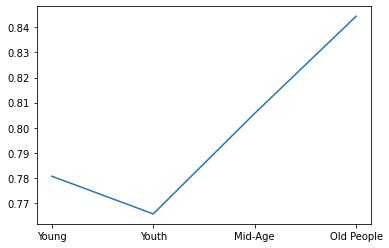

In [24]:
plt.plot(age_show);

Looks like age is a factor that affects the show up<br>
The older the patients are the more they're commited to their appointment

# Other Factors
Now we should get info about other factors that affect showing up at the appointment

We also have to count the numbers of each illness condition so we can tell the doctors which conditions are affecting people the most and what conditions have others accompanying them

# 2. Are scholars have effect on attendance?

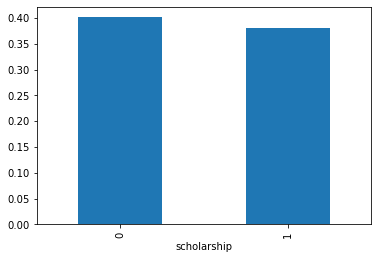

In [26]:
scholarshow = data.groupby('scholarship')['showed']
scholarshow_mean_por= scholarshow.mean()/len(scholarshow)
scholarshow_mean_por.plot(kind='bar');

Looks like the people who got the appointment for a discount or free some of them didn't attend the appointment
<br> let's see the proportion of people who hadn't attended the appointment out of the whole people who had scholarships<br>
Here we'll mask out values of scholars and view a pie chart of if they attended or not 

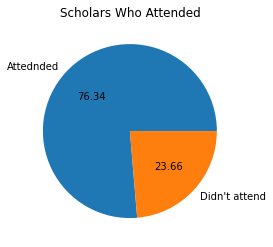

In [27]:
scholars = data[data['scholarship'] == 1]
scholars['showed'].value_counts().plot.pie(title='Scholars Who Attended',ylabel='',labels=('Attednded',"Didn't attend"), autopct='%.2f');

About 24% of scholars didn't attend the appointment


# 3. Do illness condition counts affect the show or no show of patients?

Pie Charts on sum of each patients illnes conditions to see if they attended or not

In [38]:
data['illness_count'] = data['hipertension']+data['diabetes']+data['alcoholism']+data['handcap']

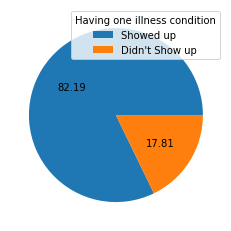

In [39]:
count1show = len(data.query('illness_count == 1 & showed == 1 '))
count1noshow = len(data.query('illness_count == 1 & showed == 0 '))
plt.pie(x=(count1show,count1noshow), autopct='%.2f');
plt.legend(labels=('Showed up',"Didn't Show up"), title='Having one illness condition')
plt.show();


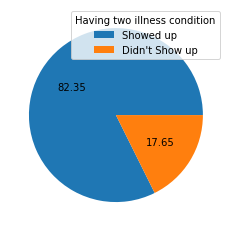

In [40]:
data['illness_count'] = data['hipertension']+data['diabetes']+data['alcoholism']+data['handcap']
count2show = len(data.query('illness_count == 2 & showed == 1 '))
count2noshow = len(data.query('illness_count == 2 & showed == 0 '))
plt.pie(x=(count2show,count2noshow), autopct='%.2f');
plt.legend(labels=('Showed up',"Didn't Show up"), title='Having two illness condition')
plt.show();

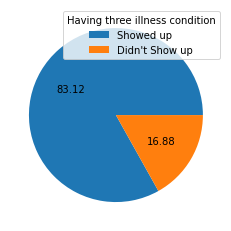

In [41]:
data['illness_count'] = data['hipertension']+data['diabetes']+data['alcoholism']+data['handcap']
count3show = len(data.query('illness_count == 3 & showed == 1 '))
count3noshow = len(data.query('illness_count == 3 & showed == 0 '))
plt.pie(x=(count3show,count3noshow), autopct='%.2f');
plt.legend(labels=('Showed up',"Didn't Show up"), title='Having three illness condition')
plt.show();

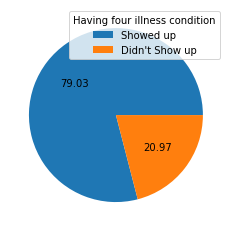

In [42]:
data['illness_count'] = data['hipertension']+data['diabetes']+data['alcoholism']+data['handcap']
count4show = len(data.query('illness_count >= 4 & showed == 1 '))
count4noshow = len(data.query('illness_count >= 4 & showed == 0 '))
plt.pie(x=(count4show,count4noshow), autopct='%.2f');
plt.legend(labels=('Showed up',"Didn't Show up"), title='Having four illness condition')
plt.show();

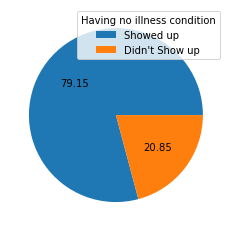

In [43]:
data['illness_count'] = data['hipertension']+data['diabetes']+data['alcoholism']+data['handcap']
count0show = len(data.query('illness_count == 0 & showed == 1 '))
count0noshow = len(data.query('illness_count == 0 & showed == 0 '))
plt.pie(x=(count0show,count0noshow), autopct='%.2f');
plt.legend(labels=('Showed up',"Didn't Show up"), title='Having no illness condition')
plt.show();

# 4. Do a specific condition have results of not showing up?
# Each condition on pie

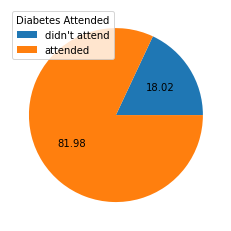

In [44]:
x=len(data.query('diabetes == 1 & showed == 0'))
y=len(data.query('diabetes == 1 & showed == 1'))
plt.pie(x=(x,y), autopct='%.2f')
plt.legend( labels=("didn't attend", 'attended'),title='Diabetes Attended')
plt.show();

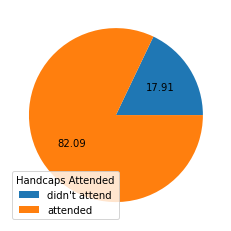

In [45]:
x=len(data.query('handcap >= 1 & showed == 0'))
y=len(data.query('handcap >= 1 & showed == 1'))
plt.pie(x=(x,y), autopct='%.2f')
plt.legend( labels=("didn't attend", 'attended'),title='Handcaps Attended')
plt.show();

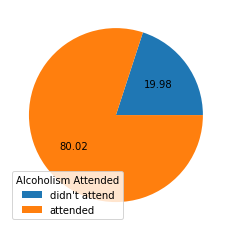

In [46]:
x=len(data.query('alcoholism == 1 & showed == 0'))
y=len(data.query('alcoholism == 1 & showed == 1'))
plt.pie(x=(x,y), autopct='%.2f')
plt.legend( labels=("didn't attend", 'attended'),title='Alcoholism Attended')
plt.show();

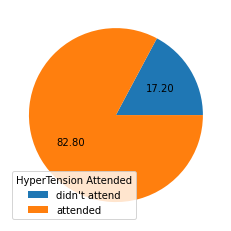

In [47]:
x=len(data.query('hipertension == 1 & showed == 0'))
y=len(data.query('hipertension == 1 & showed == 1'))
plt.pie(x=(x,y), autopct='%.2f')
plt.legend( labels=("didn't attend", 'attended'),title='HyperTension Attended')
plt.show();

As we can see illness conditions didn't really matter if the patient would come or not as the ratios are nearly similar between those who attended and those who not
# But
The highest ratio of specific Illness Conditions who didn't attend the appointment was of those dealing with alcoholism

In [48]:
data['showed'] = data['showed'].replace([1],'Yes')
data['showed'] = data['showed'].replace([0],'No')
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed,day_diff,age_class,illness_count
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,0,Old People,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,0,Old People,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,0,Old People,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,0,Young,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,0,Old People,2


Percentages of people who attended with illness conditions counts
 illness_count  showed
0              No         20.845640
               Yes        79.154360
1              No         17.808907
               Yes        82.191093
2              No         17.648596
               Yes        82.351404
3              No         16.881029
               Yes        83.118971
4              No         19.672131
               Yes        80.327869
5              No        100.000000
Name: illness_count, dtype: float64


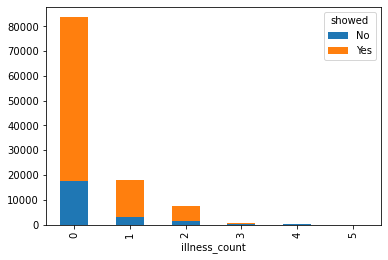

In [49]:
count_show = data.groupby(['illness_count','showed'])['illness_count'].count()
total = data.groupby(['illness_count'])['illness_count'].count()

count_show.unstack('showed').plot(kind='bar', stacked=True)
print("Percentages of people who attended with illness conditions counts\n",(count_show/total)*100)

Ranges of People who didn't attended due to illness condition counts are relatively similar except for those who has 5 illness condtions they didn't come at all

# SMS_Received
Let's see if the people who received SMS to remind them for the appointment count a difference or not
# 5. Did SMS receiving affect people to come?

Percentages of people who attended and didn't with SMS and not
 sms_received  showed
0             No        16.543465
              Yes       83.456535
1             No        27.574545
              Yes       72.425455
dtype: float64


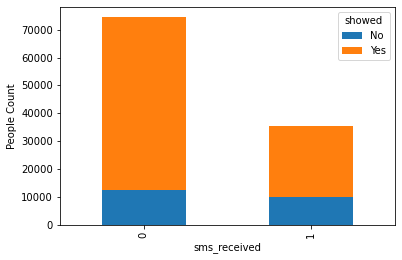

In [56]:
count_show = data.groupby(['sms_received', 'showed'])['sms_received'].count()
total = data.groupby(['sms_received'])['illness_count'].count()
print("Percentages of people who attended and didn't with SMS and not\n",(count_show/total)*100)
count_show.unstack('showed').plot(kind='bar', stacked=True, legend=True, ylabel='People Count');

In [52]:
received = data[data['showed'] == 'Yes'].groupby('sms_received').count()['age']
total_show = data[data['showed'] == 'Yes'].count()['age']
proportion_sms = received/total_show

<AxesSubplot:xlabel='sms_received', ylabel='People mean'>

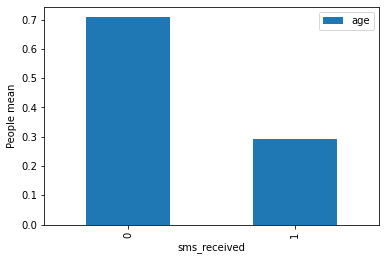

In [60]:
proportion_sms.plot(kind='bar',legend=True, ylabel='People mean')

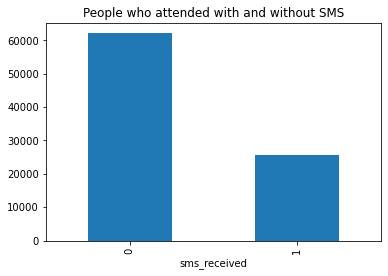

In [61]:
# SMS Receive = 1 Means that they have received SMS and vice versa
received.plot(kind='bar',title='People who attended with and without SMS');

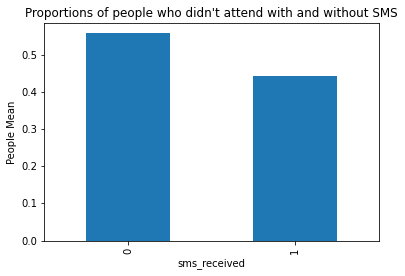

In [66]:
not_received = data[data['showed'] == 'No'].groupby('sms_received').count()['age']
total = data[data['showed'] == 'No'].count()['age']
proportion = not_received/total
proportion.plot(kind='bar', title="Proportions of people who didn't attend with and without SMS", ylabel='People Mean');

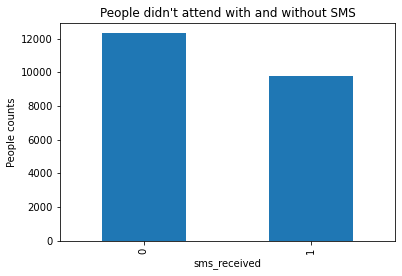

In [68]:
not_received.plot(kind='bar',title="People didn't attend with and without SMS",ylabel='People counts');

As we can see here that people who received SMS reminding them for their appointment has a big differnce of people who didn't attend, Well this is kind of weird

# Dates
<b> Now lets see if the differences between the appointment day and the day that appointment was scheduled differed!!
# 6. Is there a relation between schedulation dates and appointment dates?

In [70]:
day_show = data[data['showed']=='Yes'].groupby(['day_diff']).count()['age']
day_show

day_diff
0      36701
1       4063
2       5103
3       2076
4       4046
       ...  
155        4
162        9
169        7
176       10
179        8
Name: age, Length: 124, dtype: int64

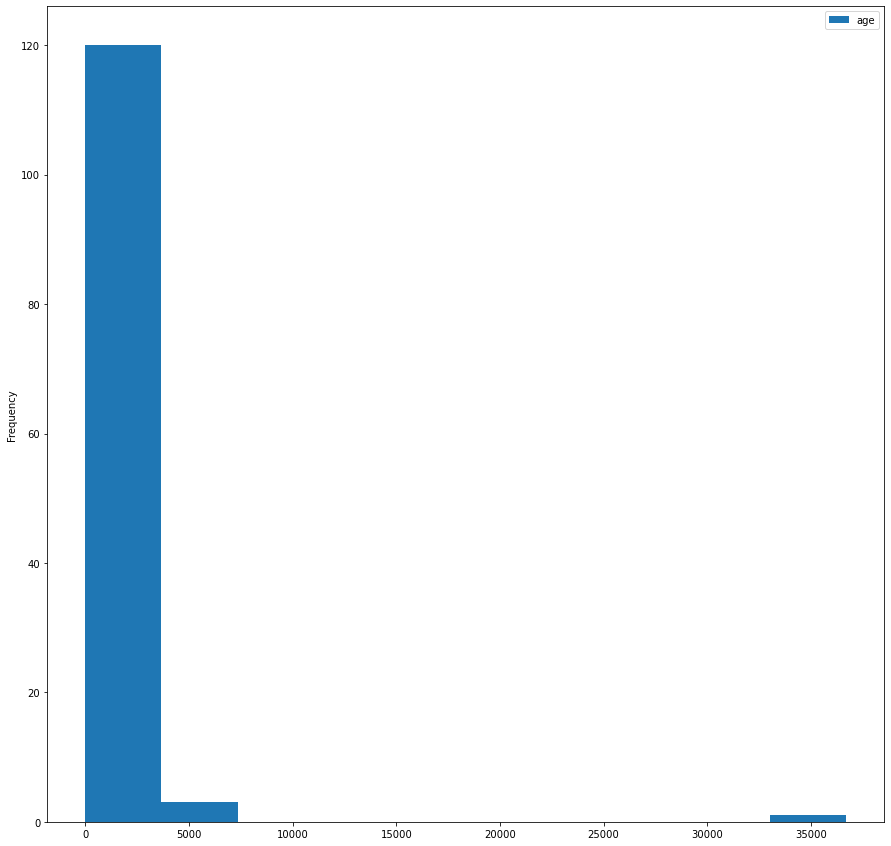

In [74]:
day_show.plot(kind='hist', figsize=(15,15),ylabel='Day Diff',legend=True, xlabel='People Show');

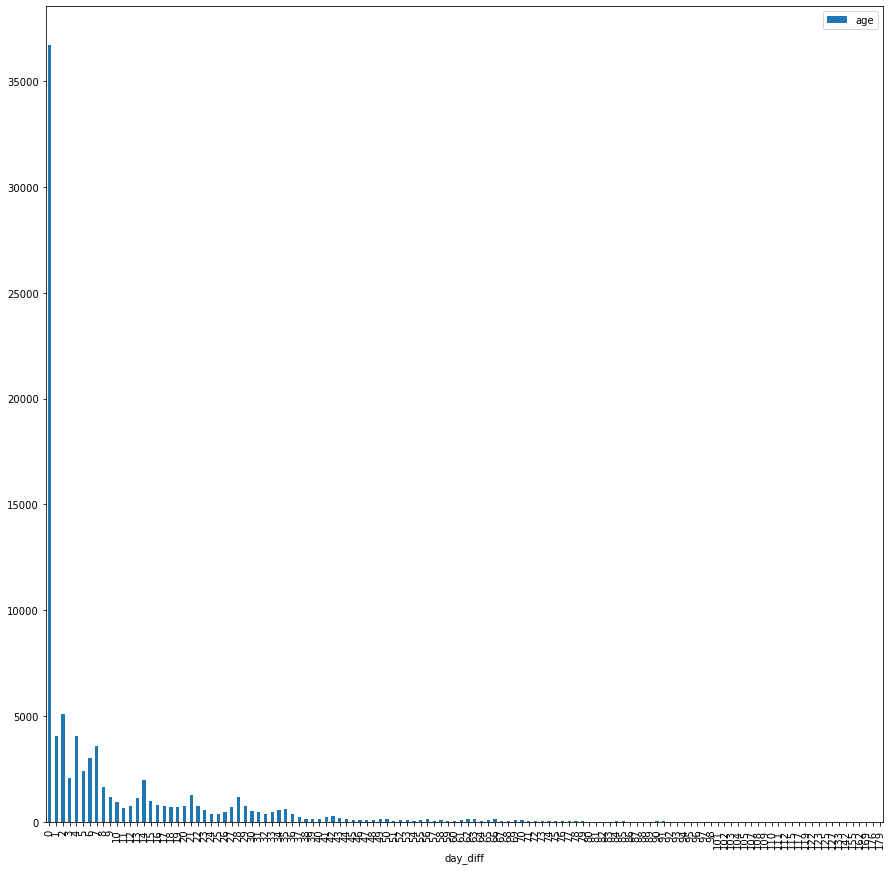

In [73]:
day_show.plot(kind='bar',figsize=(15,15),legend=True);

In [50]:
day_show = data[data['showed']=='No'].groupby(['day_diff']).count()['age']
day_show

day_diff
0      1776
1      1099
2      1595
3       635
4      1223
       ... 
155       6
162       2
169       1
176       6
179       2
Name: age, Length: 111, dtype: int64

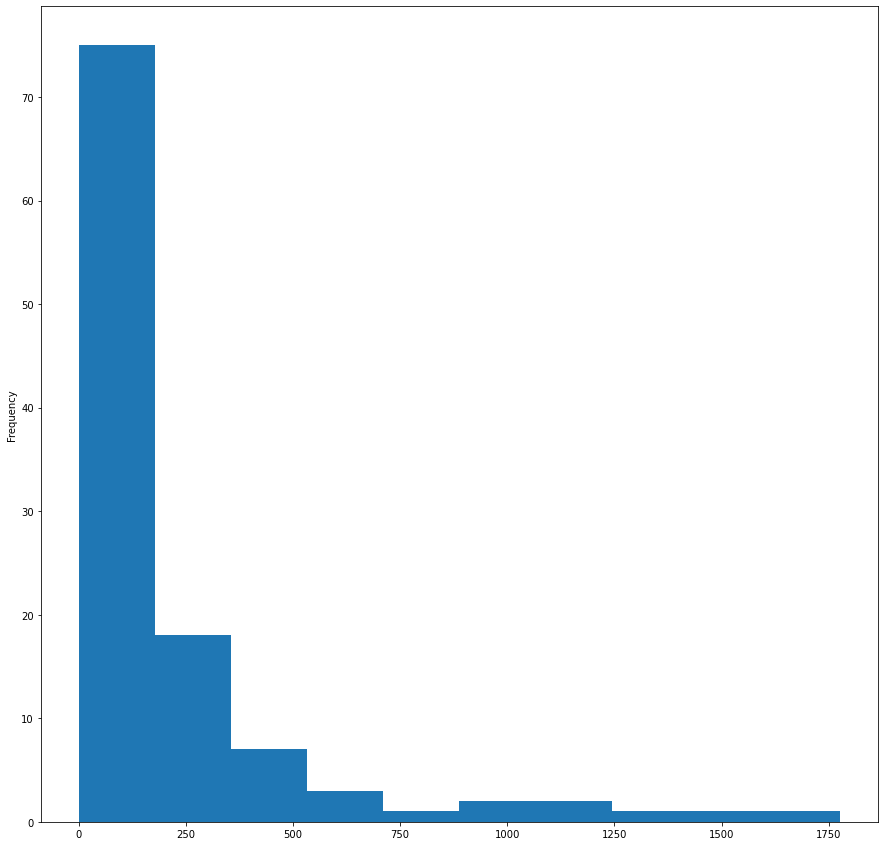

In [51]:
day_show.plot(kind='hist', figsize=(15,15),ylabel='Day Diff');

<AxesSubplot:xlabel='day_diff'>

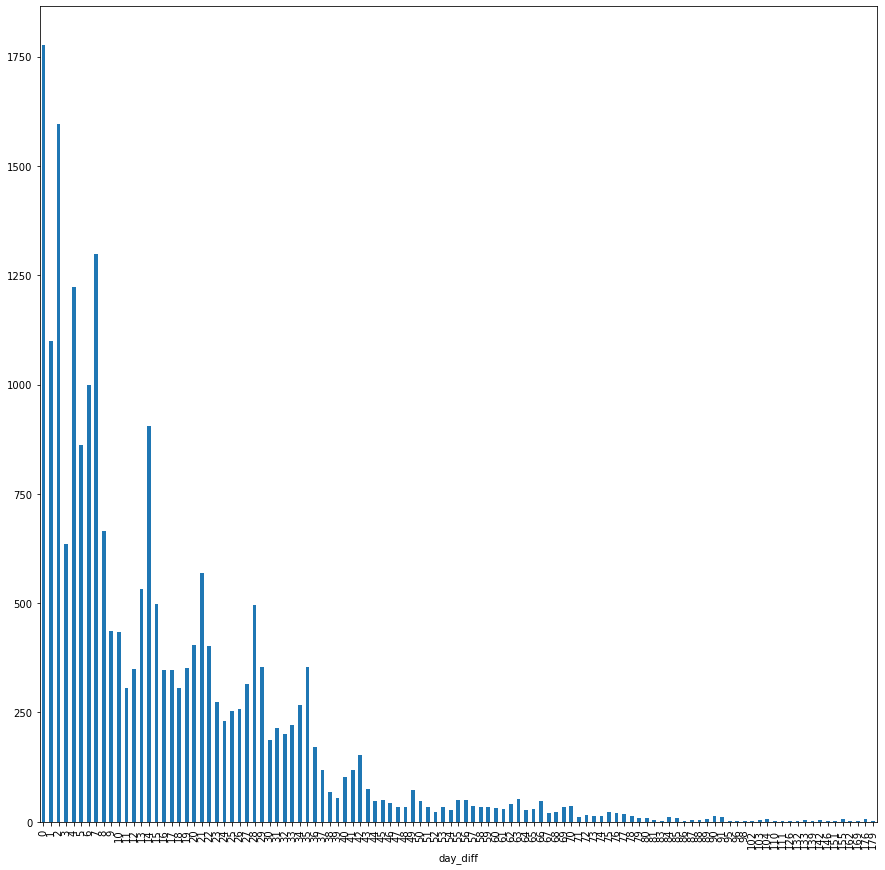

In [52]:
day_show.plot(kind='bar',figsize=(15,15))

As the graphs up here show, counts of people who scheduled and had appointments at the same day are very high also they have been the most to attend the appointment

# Are no-show appointments associated with a certain gender?

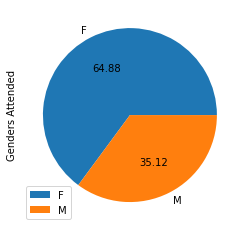

In [53]:
data[data['showed'] == 'Yes']['gender'].value_counts().plot(kind='pie',ylabel='Genders Attended',autopct='%.2f').legend();

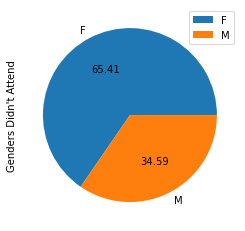

In [54]:
data[data['showed'] == 'No']['gender'].value_counts().plot(kind='pie',ylabel="Genders Didn't Attend",autopct='%.2f').legend();

In order to show a full summary of gender attendance we shall group the show up and gender together

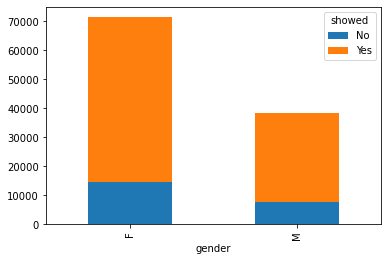

In [75]:
data.groupby(['showed','gender'])['gender'].count().unstack('showed').plot(kind='bar', stacked=True);


# Final Conclusions
<ol>
<li>Schedulations have been between 0 and 179 days which is the same day of appointments and 3 months before</li>
<li>Most people Attended were those who scheduled the same day and the ratio of attendance decrease gradually as the day difference increases</li>
<li>Most Patients were females</li>
<li>The older the patients the more careful they are about their health</li>
<li>24% of scholars didn't attend their appointments, which means that being enrolled in scholarship programs doesn't seem to make people likely to show up</li>
<li>People who are alcoholic tend to be less careful about their lives</li>
<li>The more the people have illness conditions they are more likely to come except for those having more than 4 illness conditions</li>
<li>Hypertensions patients are the most to attend out of all conditions</li>
<li>SMS reminders didn't affect people to show up, the graphs show that people who have received SMS have a reliable number of not showing up</li>
</ol>

# Limitations
<ol>
<li>Strong correlations don't exist since data is categorical</li>
<li>All statistics were descriptive</li>
</ol>